<a href="https://colab.research.google.com/github/sky309/ACS_Data_Analysis_Ze/blob/main/ZenatixAc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Identify patterns/trends in the data?
2. Which AC was used the most/least?

In [33]:
# Importing Python Packages and Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# data location
file= '/content/drive/MyDrive/Skill/Interview/Zenatix/AC_Data.csv'

In [36]:
# Dispaly all columns:
pd.set_option("display.max_columns", None)

In [37]:
# Display all the columns:
pd.set_option('display.max_rows', None)

In [38]:
# Reading the dataset
data= pd.read_csv(file)

# Data PreProcessing:

In [39]:
data.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [40]:
data.shape

(87840, 19)

In [41]:
# Creating copy of original data
new_data= data.copy()


In [42]:
new_data.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [43]:
new_data.tail()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87839,2019-09-30 23:59:00,1.430442,6.078281,1.891162,0.000000,1.577491,4.364239,3.126339,3.287224,3.986978,2.013912,4.821829,3.363855,3.380110,1.949240,4.026304,1.862166,3.009434,7.179719


In [44]:
#Date starts from, end to
new_data['0'].min(), new_data['0'].max()

('2019-08-01 00:00:00', '2019-09-30 23:59:00')

In [45]:
# Information about dataset:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


In [46]:
# Description of Dataset:
new_data.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


In [47]:
# removing rows
new_data= new_data.dropna(how= 'all', subset= ['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18'])

In [48]:
# After removal of null rows
new_data.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


In [49]:
# Checking Missing Values:
new_data.isna().sum()

0           0
AC 1     8271
AC 2     8268
AC 3     8266
AC 4     8275
AC 5     8263
AC 6     8262
AC 7     8300
AC 8     8275
AC 9     8325
AC 10    8289
AC 11    8309
AC 12    8266
AC 13    8260
AC 14    8283
AC 15    8264
AC 16    8269
AC 17    8265
AC 18    8256
dtype: int64

In [50]:
# Checking for ac columns:
x= new_data.iloc[:, 1:19]
x

In [51]:
# Filling all missing values by mean:
for i in x.columns:
  new_data[i].fillna(0, inplace= True)

In [52]:
# Extracting Datetime:
new_data['Month']=pd.to_datetime(new_data['0']).dt.month
new_data['Year']=pd.to_datetime(new_data['0']).dt.year
new_data['Date']=pd.to_datetime(new_data['0']).dt.date
new_data['Time']=pd.to_datetime(new_data['0']).dt.time
new_data['Week']=pd.to_datetime(new_data['0']).dt.week
new_data['Day']=pd.to_datetime(new_data['0']).dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [53]:
new_data.head(5)

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month,Year,Date,Time,Week,Day
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,8,2019,2019-08-01,00:00:00,31,Thursday
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,8,2019,2019-08-01,00:02:00,31,Thursday
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,8,2019,2019-08-01,00:04:00,31,Thursday
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,8,2019,2019-08-01,00:06:00,31,Thursday
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,8,2019,2019-08-01,00:08:00,31,Thursday


In [54]:
new_data.Year.unique()

array([2019])

In [55]:
new_data.Month.unique()

array([8, 9])

In [56]:
new_data.Date.unique()

array([datetime.date(2019, 8, 1), datetime.date(2019, 8, 2),
       datetime.date(2019, 8, 3), datetime.date(2019, 8, 4),
       datetime.date(2019, 8, 5), datetime.date(2019, 8, 6),
       datetime.date(2019, 8, 7), datetime.date(2019, 8, 8),
       datetime.date(2019, 8, 9), datetime.date(2019, 8, 10),
       datetime.date(2019, 8, 11), datetime.date(2019, 8, 12),
       datetime.date(2019, 8, 13), datetime.date(2019, 8, 14),
       datetime.date(2019, 8, 15), datetime.date(2019, 8, 16),
       datetime.date(2019, 8, 17), datetime.date(2019, 8, 18),
       datetime.date(2019, 8, 19), datetime.date(2019, 8, 20),
       datetime.date(2019, 8, 21), datetime.date(2019, 8, 22),
       datetime.date(2019, 8, 23), datetime.date(2019, 8, 24),
       datetime.date(2019, 8, 25), datetime.date(2019, 8, 26),
       datetime.date(2019, 8, 27), datetime.date(2019, 8, 28),
       datetime.date(2019, 8, 29), datetime.date(2019, 8, 30),
       datetime.date(2019, 8, 31), datetime.date(2019, 9, 1),
  

In [57]:
new_data.drop("Year", axis=1, inplace= True)

In [58]:
list(new_data.columns.values)

['0',
 'AC 1',
 'AC 2',
 'AC 3',
 'AC 4',
 'AC 5',
 'AC 6',
 'AC 7',
 'AC 8',
 'AC 9',
 'AC 10',
 'AC 11',
 'AC 12',
 'AC 13',
 'AC 14',
 'AC 15',
 'AC 16',
 'AC 17',
 'AC 18',
 'Month',
 'Date',
 'Time',
 'Week',
 'Day']

In [59]:
Acs= ['AC 1',
 'AC 2',
 'AC 3',
 'AC 4',
 'AC 5',
 'AC 6',
 'AC 7',
 'AC 8',
 'AC 9',
 'AC 10',
 'AC 11',
 'AC 12',
 'AC 13',
 'AC 14',
 'AC 15',
 'AC 16',
 'AC 17',
 'AC 18',]

#EDA: Exploratory Data Analysis:

# Q 1: Identify patterns/trends in the data?

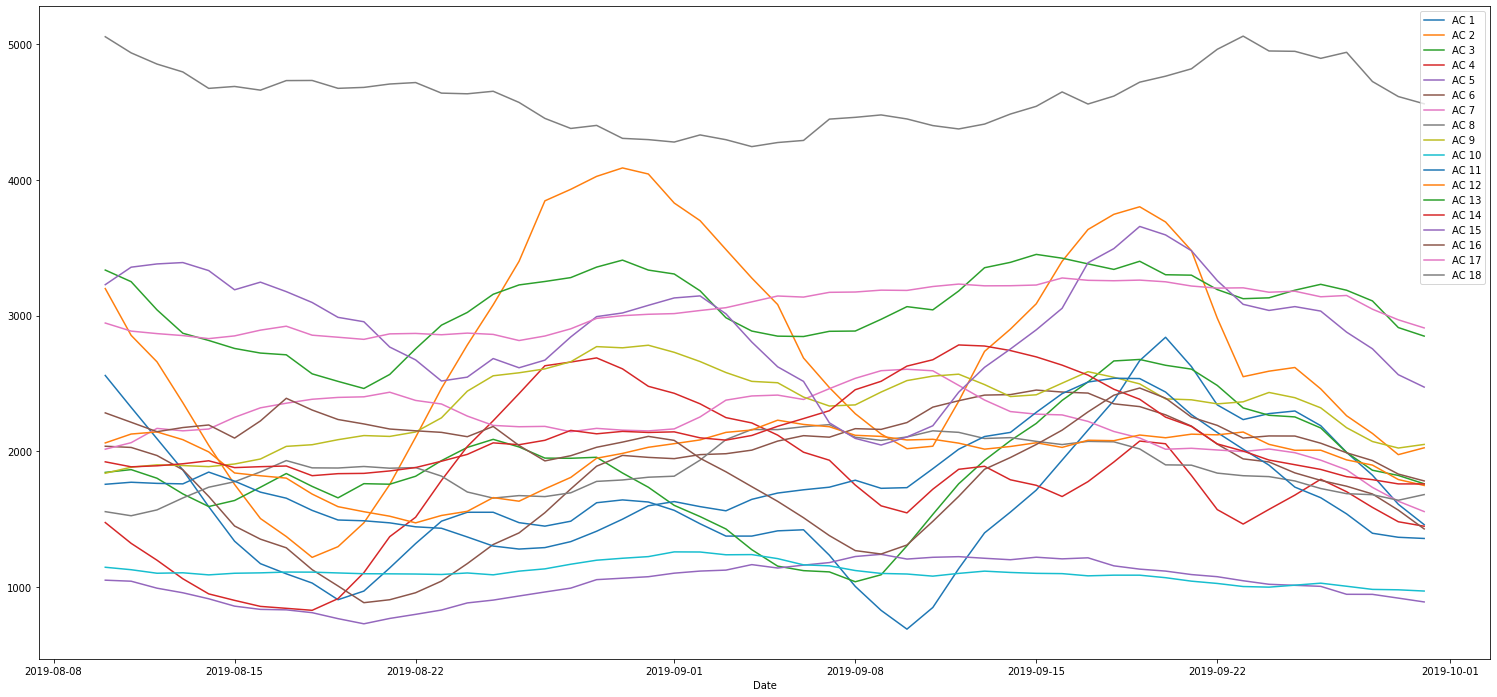

In [62]:
new_data.groupby("Date")[Acs].sum().rolling(10).\
mean().plot(figsize=(26,12))

**Between Date 22-08-2019: 01-09-2019 curves are increasing except AC 18, ACs are used more during this duration. AC 18 line is above all lines, AC 18 is used more.**

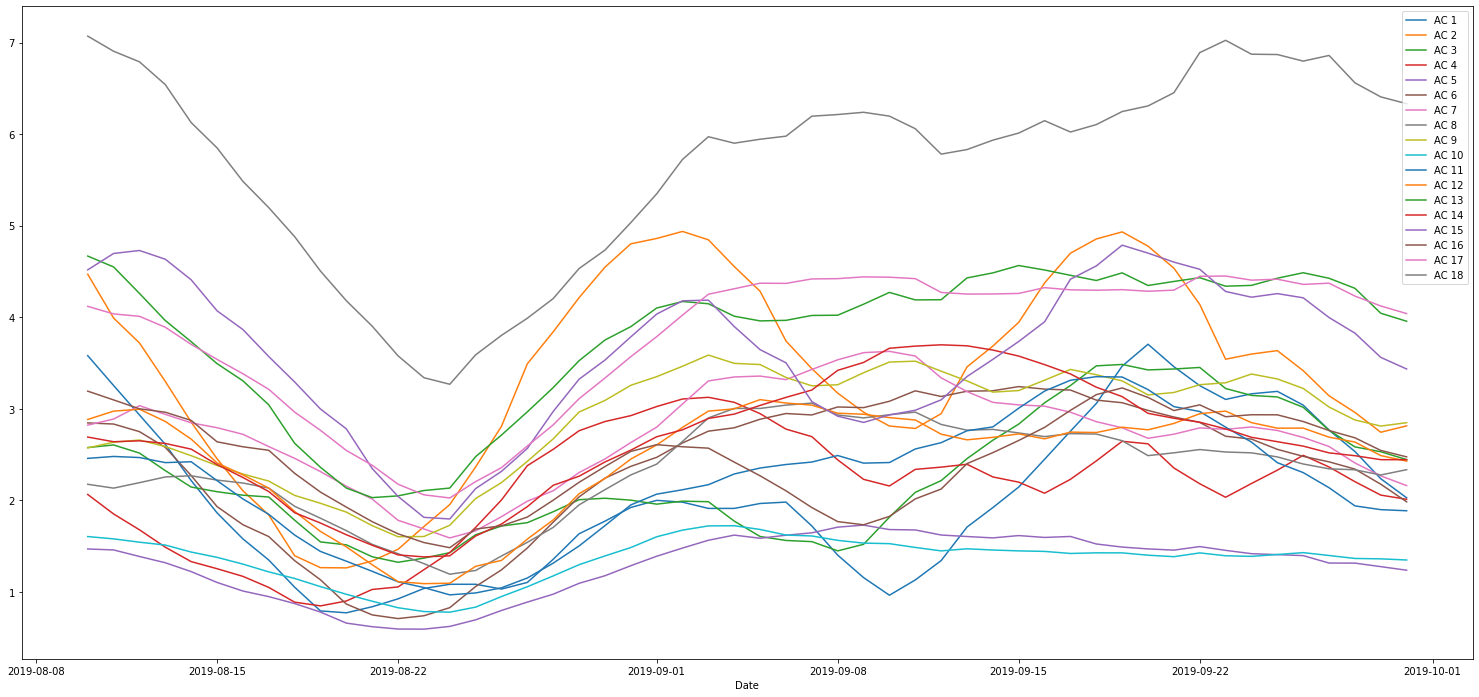

In [63]:
new_data.groupby("Date")[Acs].mean().rolling(10).mean()\
.plot(figsize=(26,12))

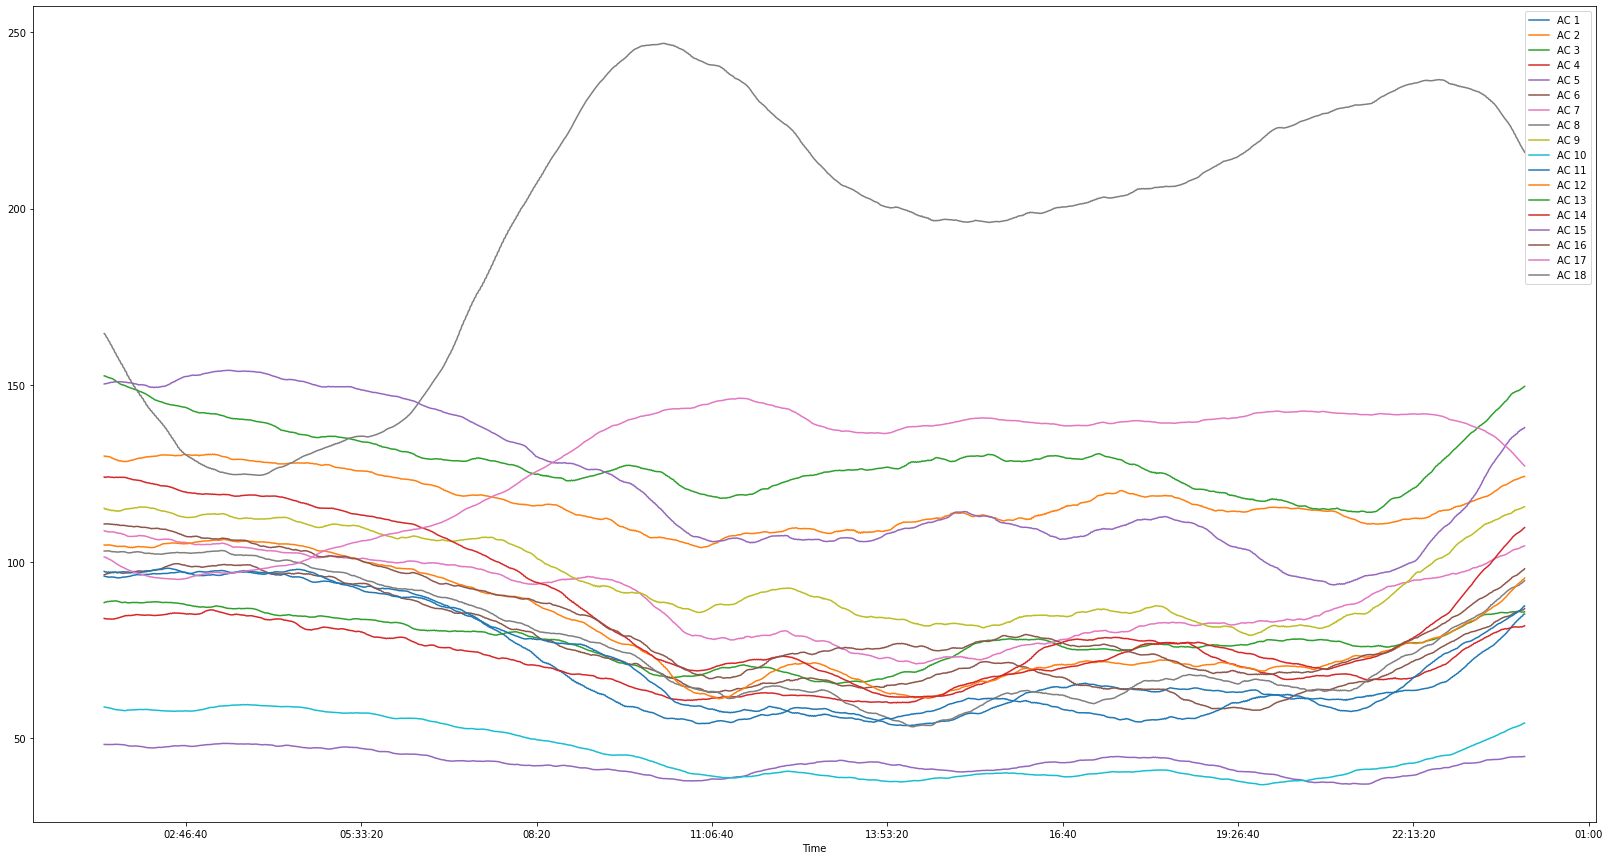

In [64]:
new_data.groupby('Time')[Acs].sum().rolling(90).mean().plot(figsize= (28,15))

**Highest increase in trends is visble nearabout 11.00 A.M - 2:00 A.M, It is is mid afternoon time. temperature is high this time.**

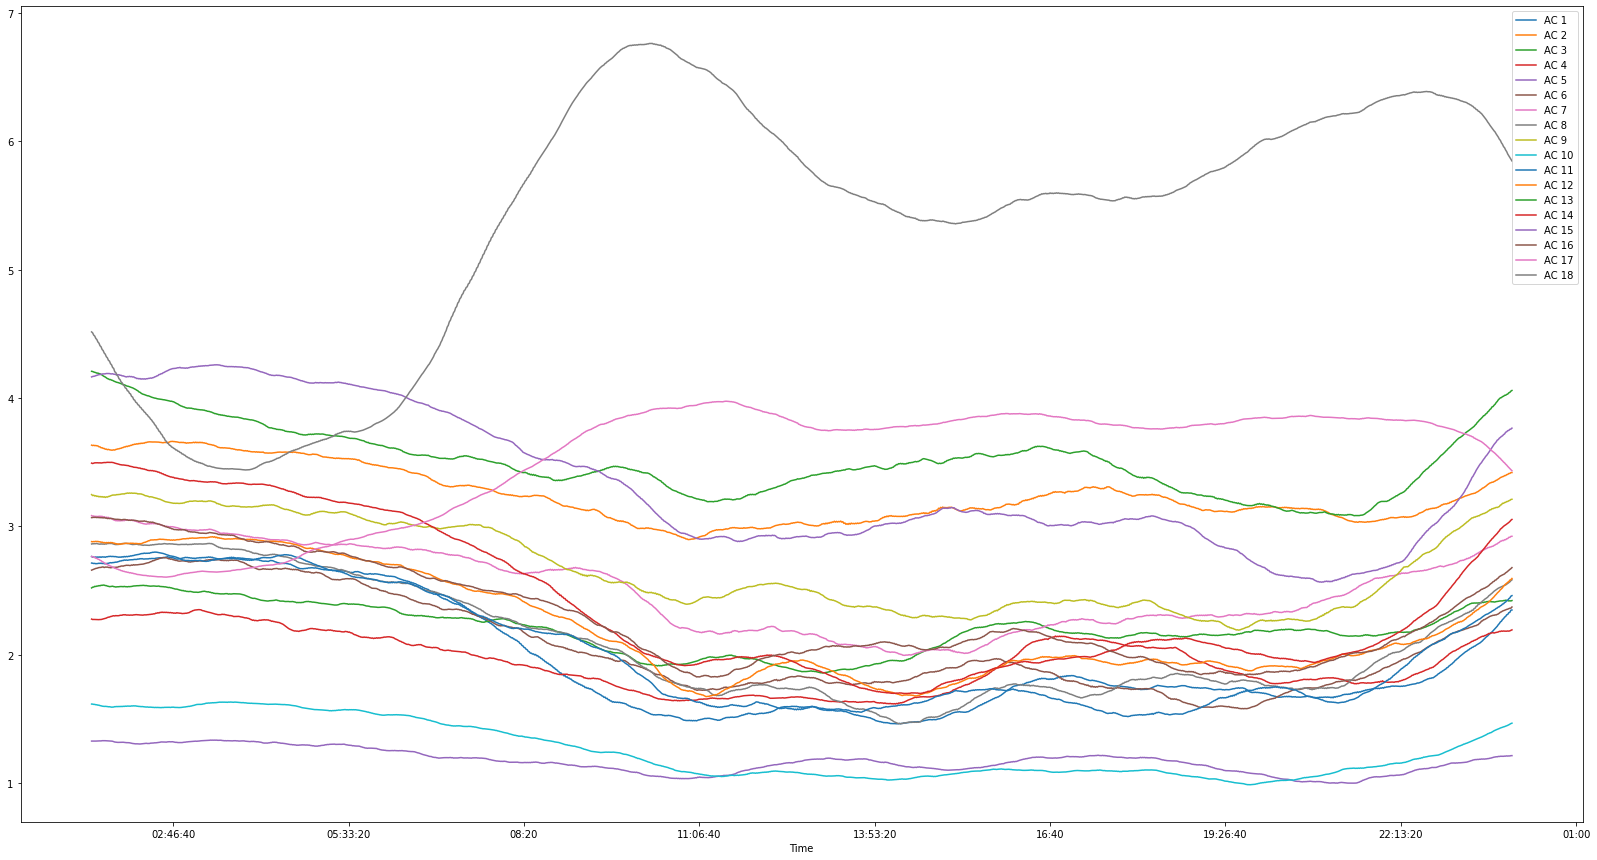

In [65]:
new_data.groupby('Time')[Acs].mean().rolling(90).mean().plot(figsize= (28,15))

**'Ac 18' is on high consumption because it is always on.**

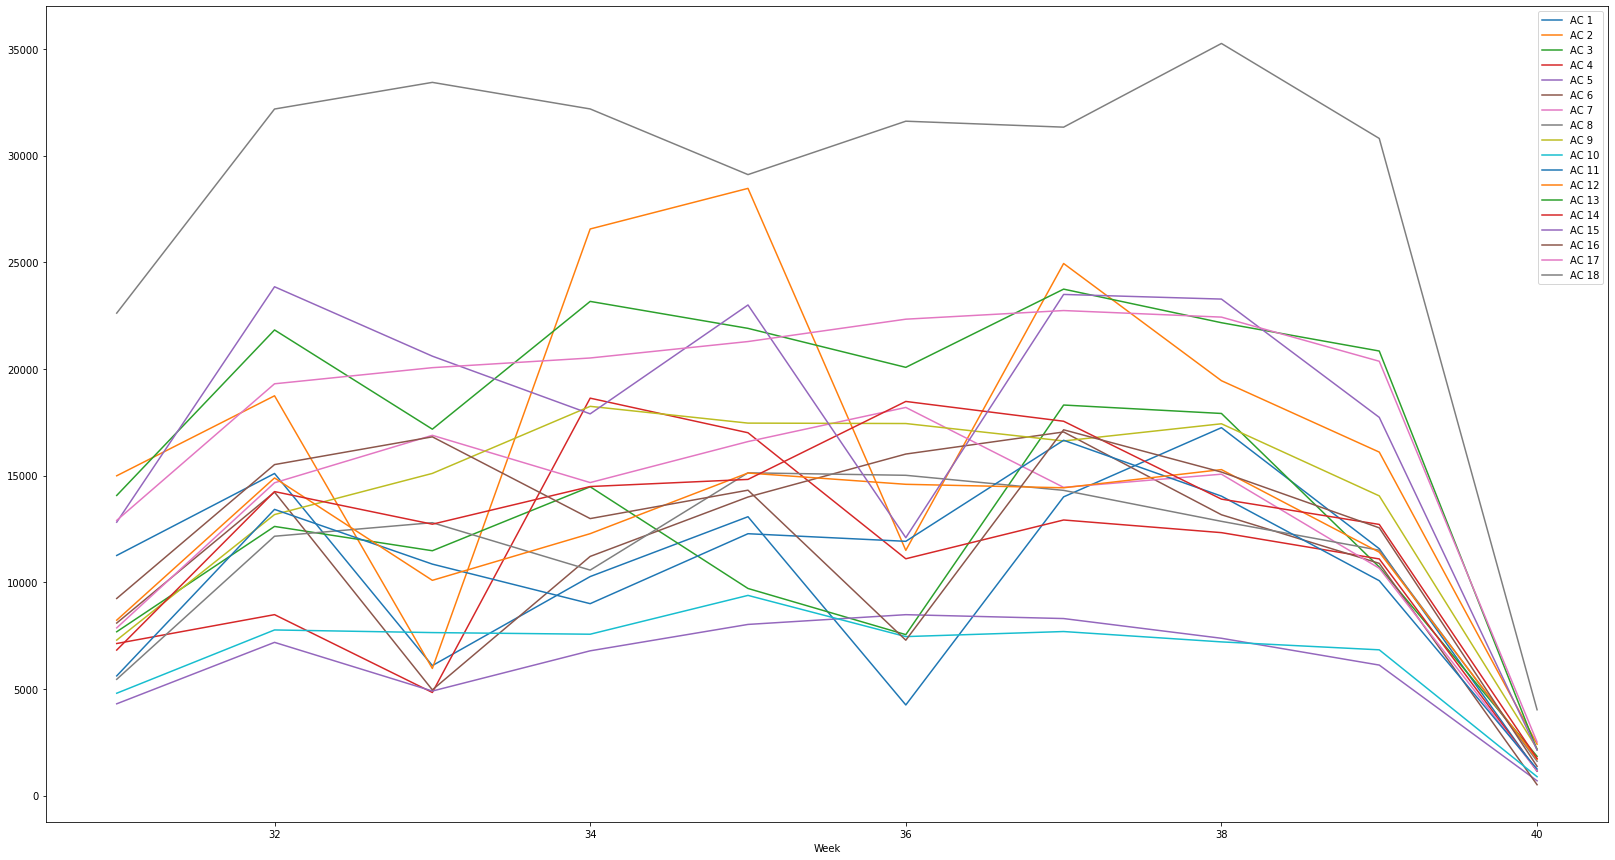

In [66]:
new_data.groupby('Week')[Acs].sum().plot(figsize= (28,15))

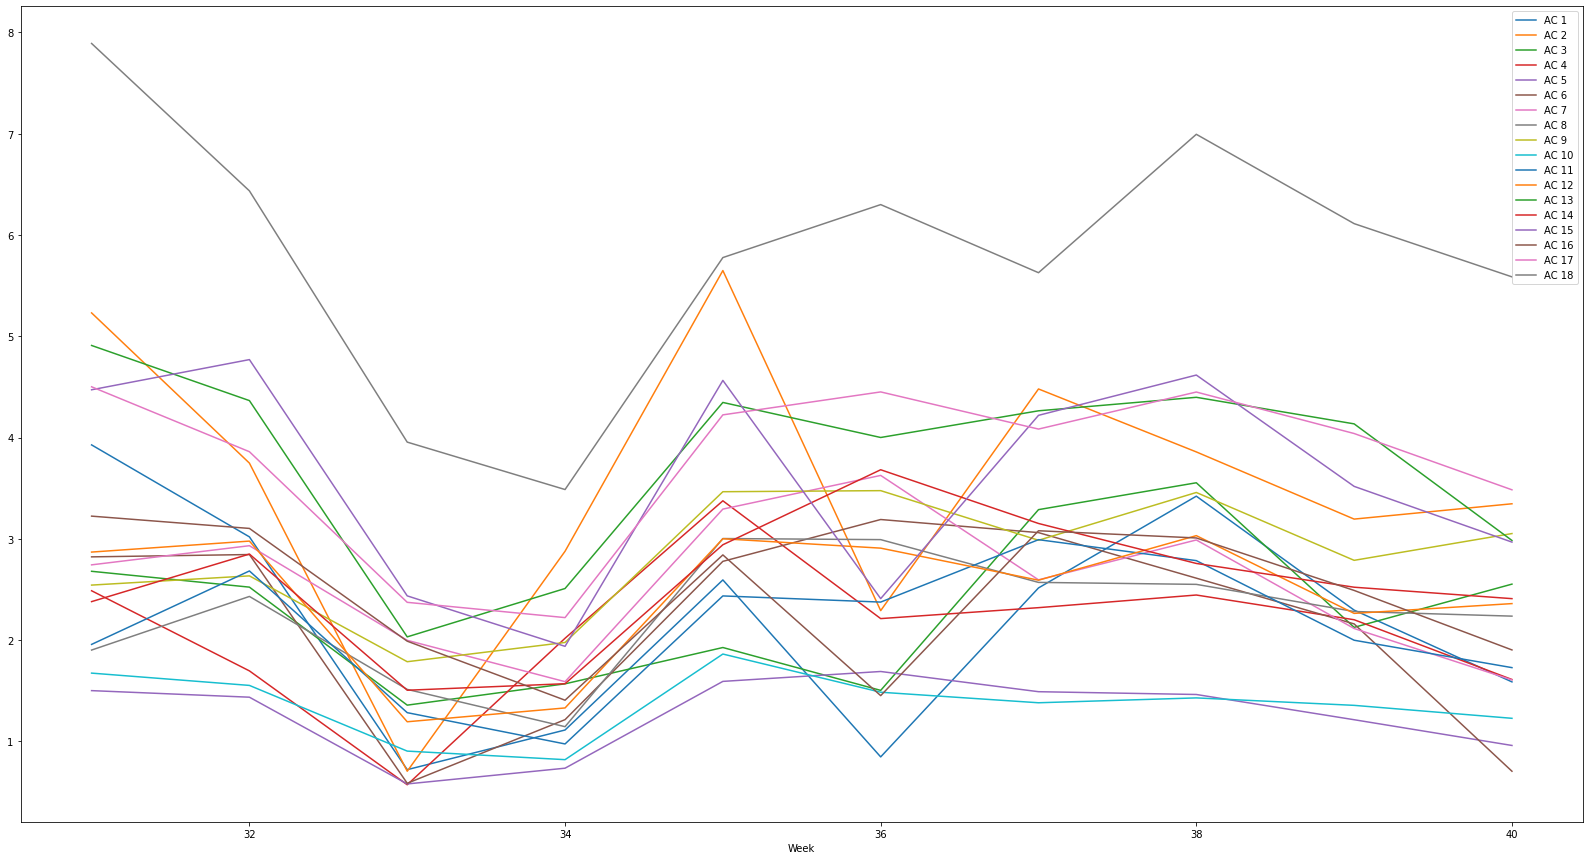

In [67]:
new_data.groupby('Week')[Acs].mean().plot(figsize= (28,15))

**36th week is showing lowest power Consumption. It may be a cloudy week.**

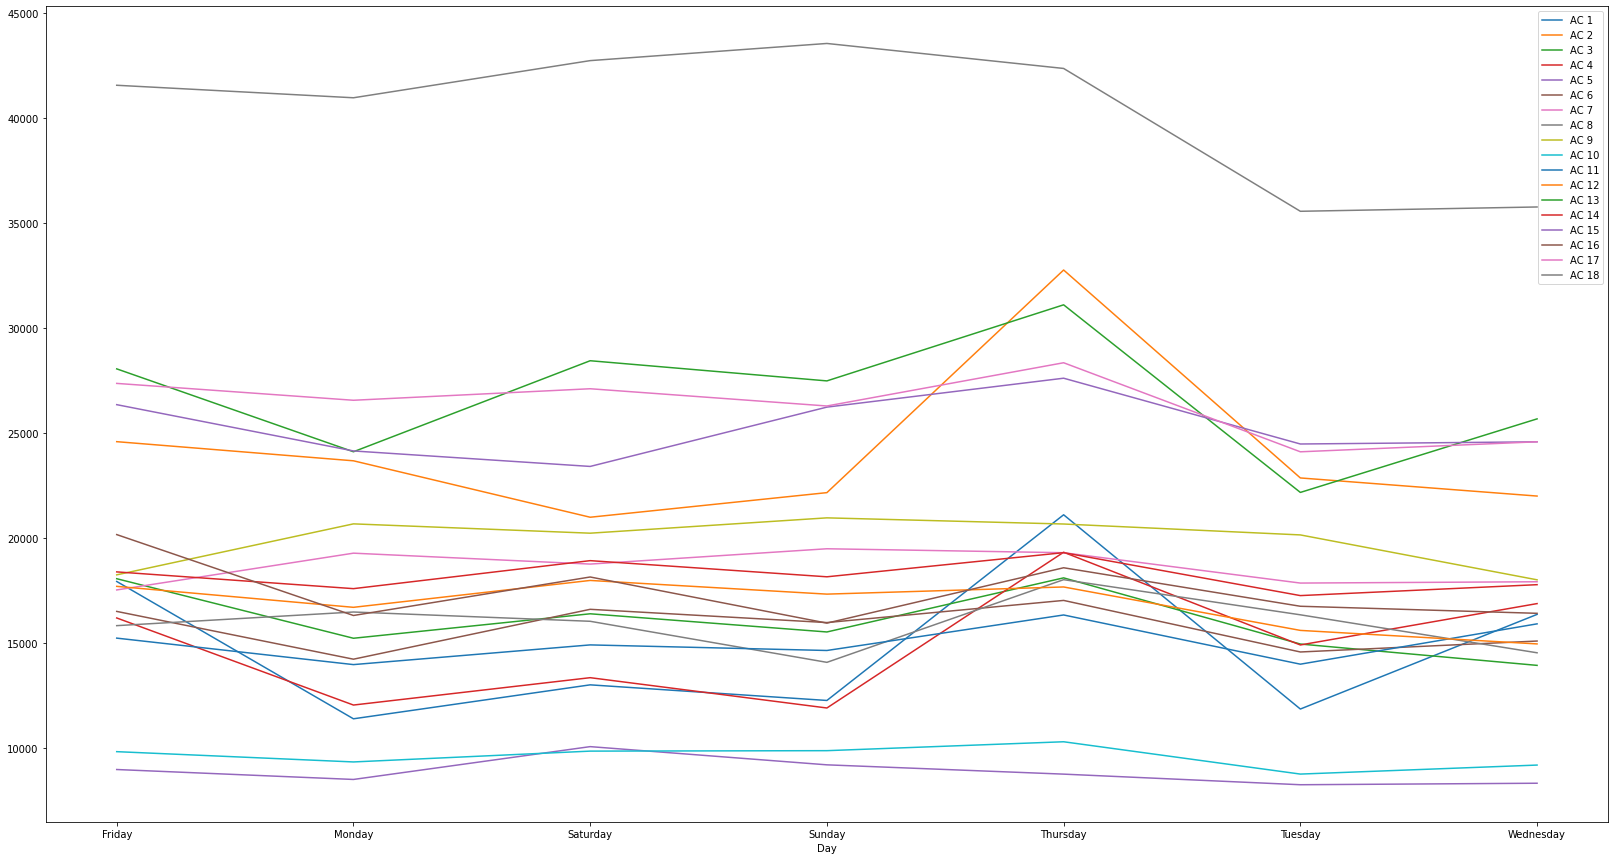

In [68]:
new_data.groupby('Day')[Acs].sum().plot(figsize= (28,15))

**Thursday is seeing increae in consumption. More people is booking hotel on this day**

In [100]:
total_power=[]
mean_power=[]
for i in Acs:
  total_power.append(new_data[i].sum())
  mean_power.append(new_data[i].mean())

Power_consumption_data= pd.DataFrame(zip(Acs, total_power, mean_power)).rename(columns= {0: 'AC_Name', 1: 'Sum', 2: 'Mean'})

In [101]:
Power_consumption_data

,AC_Name,Sum,Mean
0,AC 1,103997.423000,2.000758
1,AC 2,169113.147946,3.253490
2,AC 3,112272.957042,2.159968
3,AC 4,104678.005269,2.013852
4,AC 5,62151.007653,1.195695
5,AC 6,110085.431915,2.117883
6,AC 7,130202.009333,2.504896
7,AC 8,111388.856216,2.142959
8,AC 9,139011.024092,2.674369
9,AC 10,67210.227984,1.293027


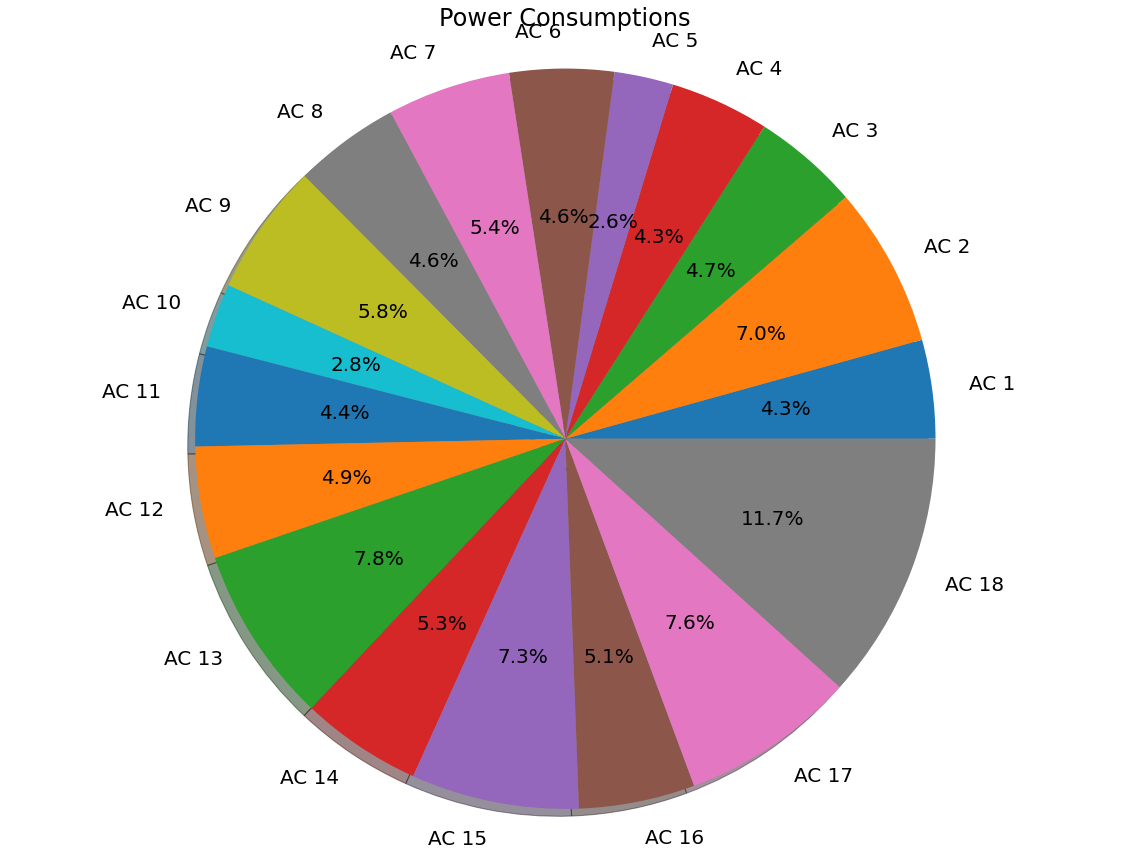

In [121]:
plt.rcParams['figure.figsize']=(20,15)
plt.rcParams['font.size'] = 20.0
plt.pie(Power_consumption_data['Sum'],labels=Acs, shadow=True, autopct='%1.1f%%')
plt.title('Power Consumptions')
plt.axis('equal')
plt.show()

**Ac18 is consuming highest power, It is used more**

Text(0, 0.5, 'Total_Power_Consumed')

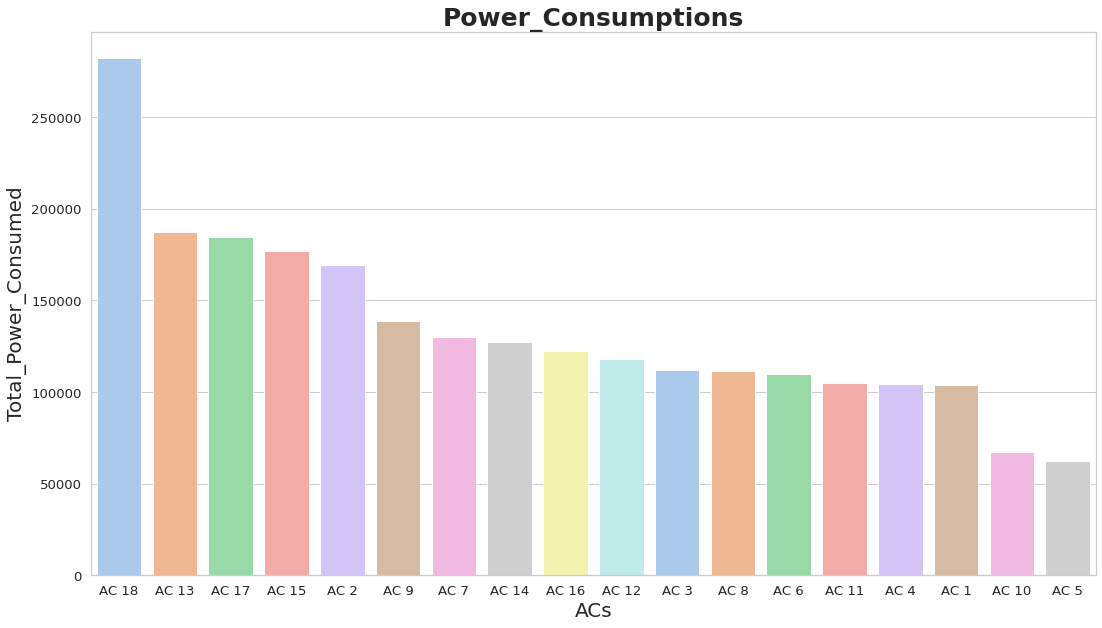

In [124]:
plt.rcParams['figure.figsize']=(18,10)
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
l=sns.barplot(x='AC_Name',y='Sum',data=Power_consumption_data.sort_values('Sum', ascending= False),palette='pastel')
l.set_title("Power_Consumptions",fontsize=25,fontweight='bold')
l.set_xlabel('ACs',fontsize=20)
l.set_ylabel('Total_Power_Consumed',fontsize=20)

# Q 2: Ac used most/least:

In [130]:
AC_used_more= Power_consumption_data[['AC_Name', 'Sum', 'Mean']].sort_values(by= 'Sum', ascending= False).head(1)
print("AC which is used more:\n", AC_used_more)

AC which is used more:
    AC_Name            Sum      Mean
17   AC 18  282567.569146  5.436187


In [129]:
AC_used_less= Power_consumption_data[['AC_Name', 'Sum', 'Mean']].sort_values(by= 'Sum', ascending= True).head(1)
print("AC which is used less is:\n", AC_used_less)

AC which is used less is:
   AC_Name           Sum      Mean
4    AC 5  62151.007653  1.195695


# Conclusions:
1. **22-08-2019: 01-09-2019 was the hottest period**

2. **11.00 A.M - 2:00 A.M, is the hottest timeis**

3. **36th week is showing lowest power Consumption. It may be a cloudy week.**

4. **Most Number of booking's was done on Thursday**

5. **AC 18 is used More**

6. **AC 5 is used less**

Thanks & Regards:

Sarvesh Kumar Yadav

https://www.linkedin.com/in/sarveshkumaryadav/

sarveshy995@gmail.com

8826685572